<a href="https://colab.research.google.com/github/richardtekere09/Machine_Learning_labs/blob/main/english_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy opencv-python-headless scikit-image matplotlib


C mean implementation

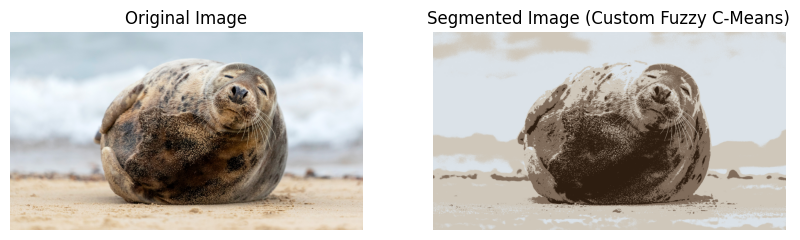

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def initialize_centroids(image, k):
    """
    Randomly initialize cluster centers from the image pixels.
    """
    pixels = image.reshape(-1, 3)  # Reshape image to list of RGB pixels
    np.random.seed(42)  # For reproducibility
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]
    return centroids

def compute_membership(image, centroids, m=2):
    """
    Compute membership values for each pixel based on distances to centroids.
    """
    pixels = image.reshape(-1, 3)

    distances = np.zeros((pixels.shape[0], len(centroids)))

    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(pixels - centroid, axis=1)

    # Avoid division by zero
    distances = np.fmax(distances, np.finfo(np.float64).eps)

    # Compute membership matrix (Fix broadcasting issue)
    U = np.zeros_like(distances)
    for i in range(len(centroids)):
        U[:, i] = 1 / np.sum((distances[:, i].reshape(-1, 1) / distances) ** (2 / (m - 1)), axis=1)

    return U

def update_centroids(image, U, k):
    """
    Update centroids based on membership values.
    """
    pixels = image.reshape(-1, 3)
    new_centroids = np.zeros((k, 3))

    for i in range(k):
        numerator = np.sum((U[:, i] ** 2)[:, None] * pixels, axis=0)
        denominator = np.sum(U[:, i] ** 2)
        new_centroids[i] = numerator / denominator

    return new_centroids

def fuzzy_c_means(image, k=3, max_iter=100, tol=1e-5):
    """
    Perform Fuzzy C-Means clustering.
    """
    centroids = initialize_centroids(image, k)
    for _ in range(max_iter):
        U = compute_membership(image, centroids)
        new_centroids = update_centroids(image, U, k)

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, U

def segment_image(image, centroids, U):
    """
    Assign each pixel to the most probable cluster.
    """
    segmented_image = np.zeros_like(image)
    cluster_labels = np.argmax(U, axis=1)
    segmented_image = centroids[cluster_labels].reshape(image.shape)
    return segmented_image.astype(np.uint8)

# Load and process image
image_path = '/IMG_4268.jpeg'  # Update with your image path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply custom Fuzzy C-Means
k = 4  # Number of clusters
centroids, U = fuzzy_c_means(image, k=k)
segmented_image = segment_image(image, centroids, U)

# Display Results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Segmented Image (Custom Fuzzy C-Means)")
plt.imshow(segmented_image)
plt.axis("off")

plt.show()


In [14]:
import os

image_path = '/IMG_4268.jpeg'
if not os.path.exists(image_path):
    print("Error: File not found!")
else:
    print("File found, proceeding...")


File found, proceeding...


3. Distance Metric Functions

Applying Fuzzy C-Means clustering using euclidean distance...


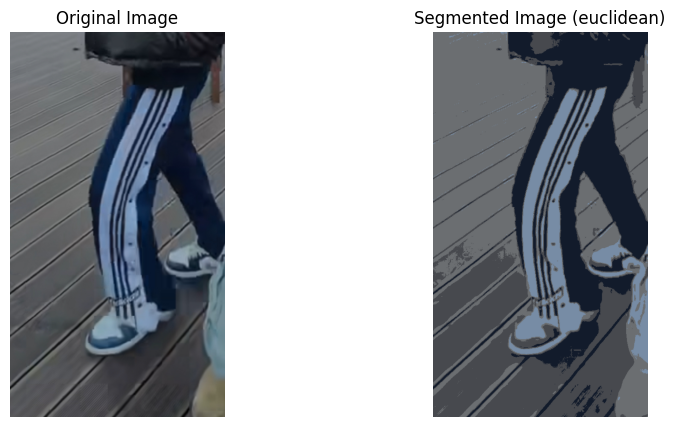

Applying Fuzzy C-Means clustering using manhattan distance...


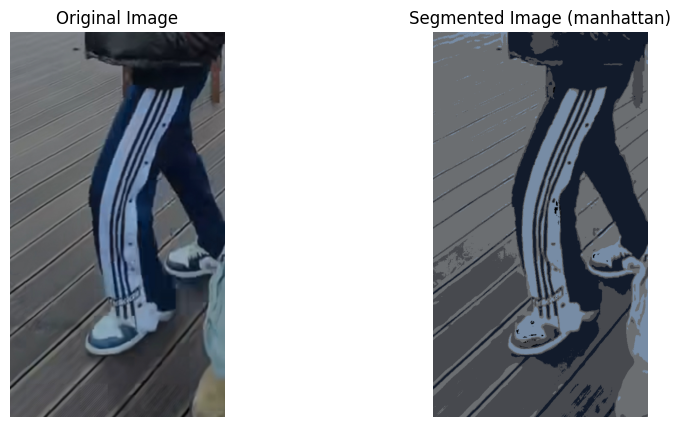

Applying Fuzzy C-Means clustering using chebyshev distance...


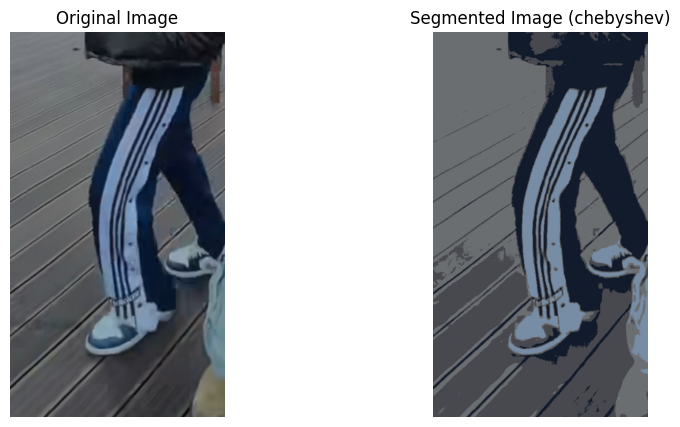

array([[[107, 110, 113],
        [107, 110, 113],
        [107, 110, 113],
        ...,
        [ 18,  27,  43],
        [ 18,  27,  43],
        [ 18,  27,  43]],

       [[107, 110, 113],
        [107, 110, 113],
        [107, 110, 113],
        ...,
        [ 18,  27,  43],
        [ 18,  27,  43],
        [ 18,  27,  43]],

       [[107, 110, 113],
        [107, 110, 113],
        [107, 110, 113],
        ...,
        [ 18,  27,  43],
        [ 18,  27,  43],
        [ 18,  27,  43]],

       ...,

       [[ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78],
        ...,
        [ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78]],

       [[ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78],
        ...,
        [ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78]],

       [[ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78],
        ...,
        [ 71,  73,  78],
        [ 71,  73,  78],
        [ 71,  73,  78]]], dtype=uint8)
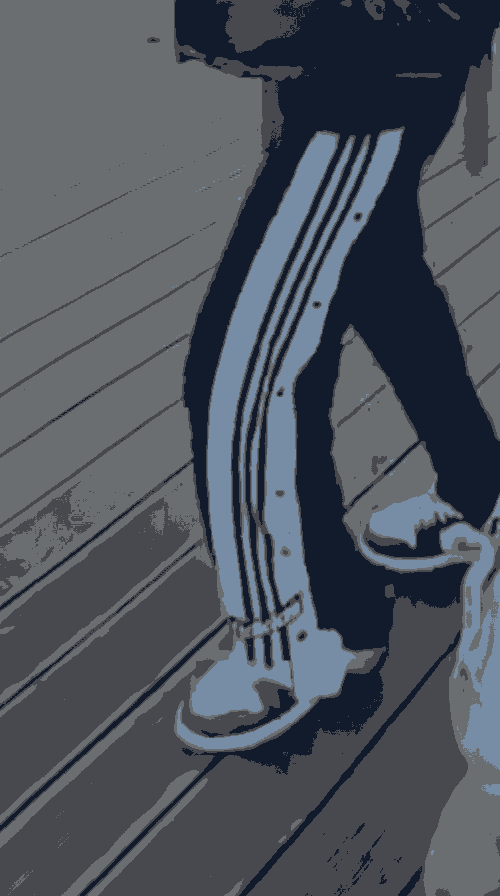

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import numpy as np
!pip install scikit-fuzzy
import matplotlib.pyplot as plt
import skfuzzy as fuzz


def calculate_distance(point1, point2, metric="euclidean"):
    """
    Calculate the distance between two points using the specified metric.
    """
    if metric == "euclidean":
        return np.linalg.norm(point1 - point2)
    elif metric == "manhattan":
        return np.sum(np.abs(point1 - point2))
    elif metric == "chebyshev":
        return np.max(np.abs(point1 - point2))
    else:
        raise ValueError(f"Unsupported metric: {metric}")

def fuzzy_c_means_with_thresholds(image_path, n_clusters=3, distance_metric="euclidean", threshold=50):
    """
    Perform Fuzzy C-Means segmentation with thresholding and custom distance metrics.
    """
    # Load and preprocess image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or path is incorrect.")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    image_2d = image.reshape((-1, c)).astype(np.float64).T

    # Apply Fuzzy C-Means clustering
    print(f"Applying Fuzzy C-Means clustering using {distance_metric} distance...")
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        image_2d, n_clusters, m=2, error=0.005, maxiter=1000
    )
    cntr = cntr.T  # Transpose centers for proper alignment

    # Map cluster membership to image
    segmented = np.zeros((image_2d.shape[1], 3))
    for i in range(image_2d.shape[1]):
        distances = [calculate_distance(image_2d[:, i], cntr[:, j], metric=distance_metric) for j in range(n_clusters)]
        min_distance = min(distances)
        if min_distance <= threshold:
            cluster_idx = distances.index(min_distance)
            segmented[i] = cntr[:, cluster_idx]
    segmented = segmented.reshape(h, w, c).astype(np.uint8)

    # Visualize segmentation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image ({distance_metric})")
    plt.imshow(segmented)
    plt.axis("off")
    plt.show()

    return segmented


    # Visualize segmentation
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title(f"Segmented Image ({distance_metric})")
    plt.imshow(segmented)
    plt.axis("off")
    plt.show()

    return segmented

image_path = '/IMG_4268.jpeg'

# Test Euclidean
fuzzy_c_means_with_thresholds(image_path, n_clusters=4, distance_metric="euclidean", threshold=70)

# Test Manhattan
fuzzy_c_means_with_thresholds(image_path, n_clusters=4, distance_metric="manhattan", threshold=70)

# Test Chebyshev
fuzzy_c_means_with_thresholds(image_path, n_clusters=4, distance_metric="chebyshev", threshold=70)



OpenCV K-Means

Applying OpenCV K-Means clustering...


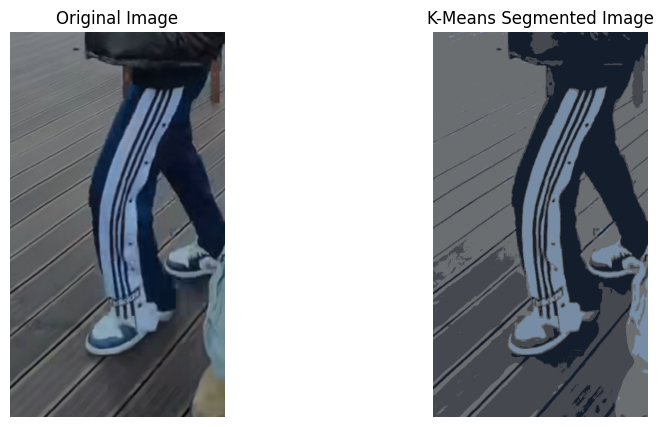

In [ ]:
def opencv_kmeans_segmentation(image_path, n_clusters=3):
    """
    Perform K-Means segmentation using OpenCV.
    """
    # Load and preprocess the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found or path is incorrect.")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, c = image.shape
    image_2d = image.reshape((-1, c)).astype(np.float32)

    # Apply K-Means clustering
    print("Applying OpenCV K-Means clustering...")
    _, labels, centers = cv2.kmeans(
        image_2d, n_clusters, None,
        criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
        attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS
    )

    # Map cluster centers to segmented image
    segmented = centers[labels.flatten()].reshape(h, w, c).astype(np.uint8)

    # Visualize the segmented image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("K-Means Segmented Image")
    plt.imshow(segmented)
    plt.axis("off")

    plt.show()

    return segmented

image_path = '/IMG_4268.jpeg'
segmented_image = opencv_kmeans_segmentation(image_path, n_clusters=4)


Comparison Function

Applying Fuzzy C-Means clustering using euclidean distance...


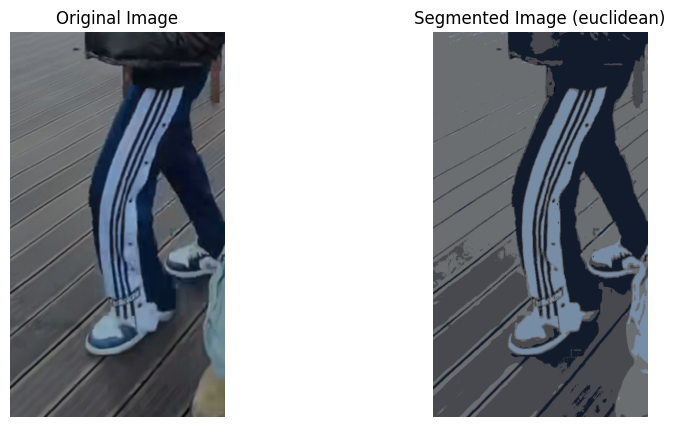

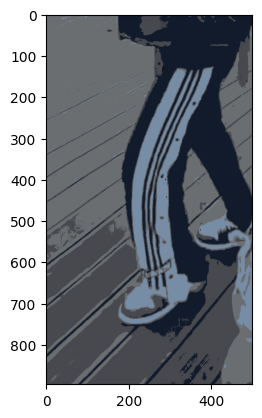

Applying OpenCV K-Means clustering...


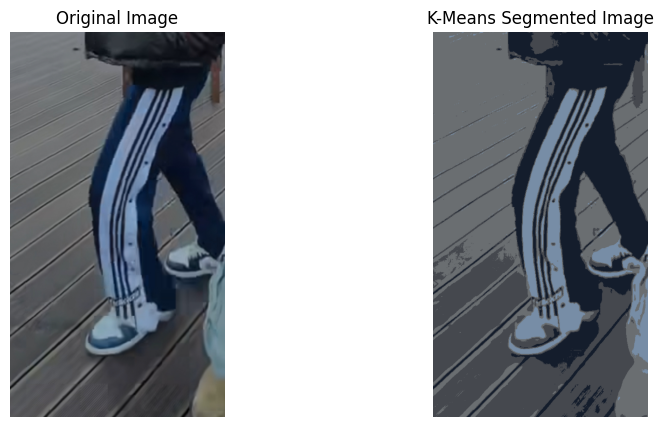

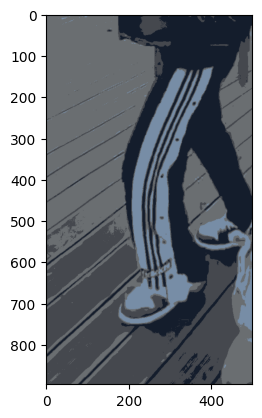

In [ ]:
fuzzy_segmented = fuzzy_c_means_with_thresholds(image_path, n_clusters=4, distance_metric="euclidean", threshold=50)
plt.imshow(fuzzy_segmented)
plt.show()

kmeans_segmented = opencv_kmeans_segmentation(image_path, n_clusters=4)
plt.imshow(kmeans_segmented)
plt.show()
